## Notebook Overview

texttexttext

## Imports & Configurations

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
TITLE_RATINGS_PATH = r".\data\title.ratings.tsv"
TITLE_BASICS_PATH = r".\data\title.basics.tsv"

AVG_RATING = 8
RATING_COUNT = 1500000

AVG_RATING_W_YEARS = 7
RATING_COUNT_W_YEARS = 100000
RECENT_YEARS = [2024, 2025]

## Data Analysis & Feature Engineering

In [3]:
title_basics_df = pd.read_csv(TITLE_BASICS_PATH, sep="\t", low_memory=False, na_values="\\N", on_bad_lines='skip')
title_ratings_df = pd.read_csv(TITLE_RATINGS_PATH, sep="\t", low_memory=False, na_values="\\N", on_bad_lines='skip')

In [4]:
df_list = [title_basics_df, title_ratings_df]

for df in df_list:
    print("First 5 row:\n")
    print(df.head())
    print("Shape:\n")
    print(df.shape)
    print("Information:\n")
    print(df.info())
    print("Description:\n")
    print(df.describe())

First 5 row:

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear runtimeMinutes                    genres  
0        0     1894.0      NaN              1         Documentary,Short  
1        0     1892.0      NaN              5           Animation,Short  
2        0     1892.0      NaN              5  Animation,Comedy,Romance  
3        0     1892.0      NaN             12           Animation,Short  
4        0     1893.0      NaN              1                     Short  
Shape:

(11957318, 9)
Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957318 en

In [5]:
title_basics_df["titleType"].value_counts()

titleType
tvEpisode       9207148
short           1087439
movie            727974
video            317000
tvSeries         288708
tvMovie          152585
tvMiniSeries      65476
tvSpecial         54813
videoGame         45396
tvShort           10778
tvPilot               1
Name: count, dtype: int64

In this notebook, I just make an effort on movies. Therefore, I must make filtered the dataset.

In [6]:
movie_ratings_df = title_basics_df[(title_basics_df["titleType"] == "movie") | (title_basics_df["titleType"] == "tvMovie")]
movie_ratings_df.shape # It must be movie + tvMovie -> (727974 + 152585)

(880559, 9)

In [7]:
movies_with_ratings = movie_ratings_df.merge(
    title_ratings_df[['tconst', 'averageRating', 'numVotes']],
    on='tconst',
    how='left'
)

In [13]:
movies_with_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.3,228.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,100,"Documentary,News,Sport",5.3,572.0
2,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100,NaN,3.7,23.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70,"Action,Adventure,Biography",6.0,1028.0
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90,Drama,5.3,34.0


In [14]:
movies_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880559 entries, 0 to 880558
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          880559 non-null  object 
 1   titleType       880559 non-null  object 
 2   primaryTitle    880556 non-null  object 
 3   originalTitle   880556 non-null  object 
 4   isAdult         880559 non-null  int64  
 5   startYear       768689 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  564485 non-null  object 
 8   genres          789505 non-null  object 
 9   averageRating   392873 non-null  float64
 10  numVotes        392873 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 73.9+ MB


In [23]:
movies_with_ratings = movies_with_ratings.drop(
    movies_with_ratings[
        (movies_with_ratings["averageRating"].isna()) & (movies_with_ratings["numVotes"].isna())
    ].index
)

In [24]:
movies_with_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.3,228.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,100,"Documentary,News,Sport",5.3,572.0
2,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100,NaN,3.7,23.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70,"Action,Adventure,Biography",6.0,1028.0
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90,Drama,5.3,34.0


## Popularity without startYear

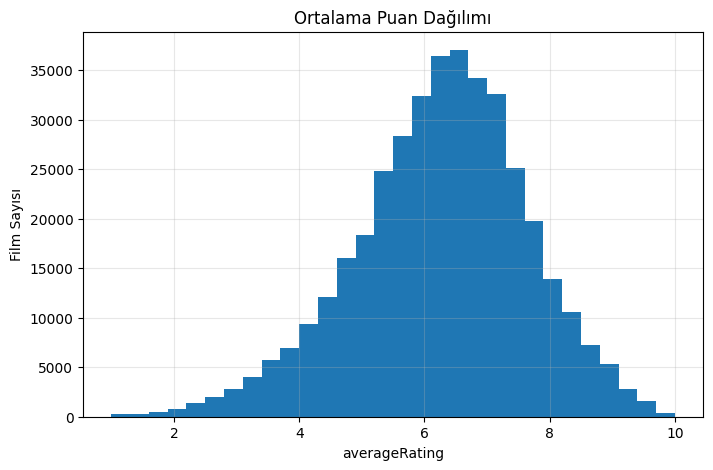

In [26]:
plt.figure(figsize=(8,5))
plt.hist(movies_with_ratings["averageRating"].dropna(), bins=30)
plt.title("Ortalama Puan Dağılımı")
plt.xlabel("averageRating")
plt.ylabel("Film Sayısı")
plt.grid(alpha=0.3)
plt.show()

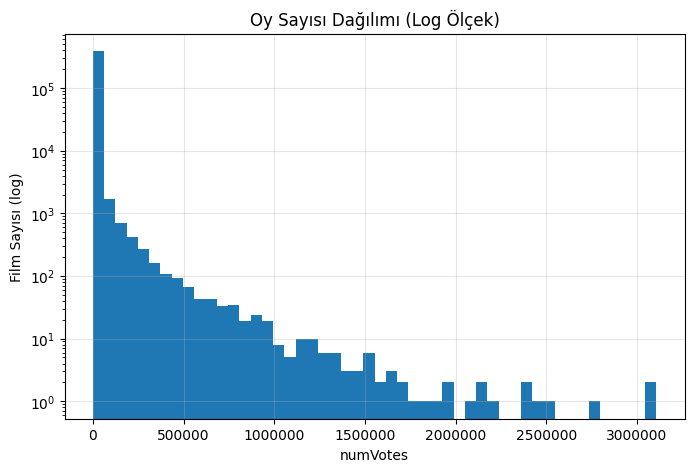

In [30]:
plt.figure(figsize=(8,5))
plt.hist(movies_with_ratings["numVotes"].dropna(), bins=50, log=True)
plt.title("Oy Sayısı Dağılımı (Log Ölçek)")
plt.xlabel("numVotes")
plt.ylabel("Film Sayısı (log)")
plt.grid(alpha=0.3)

plt.ticklabel_format(style='plain', axis='x')
plt.show()

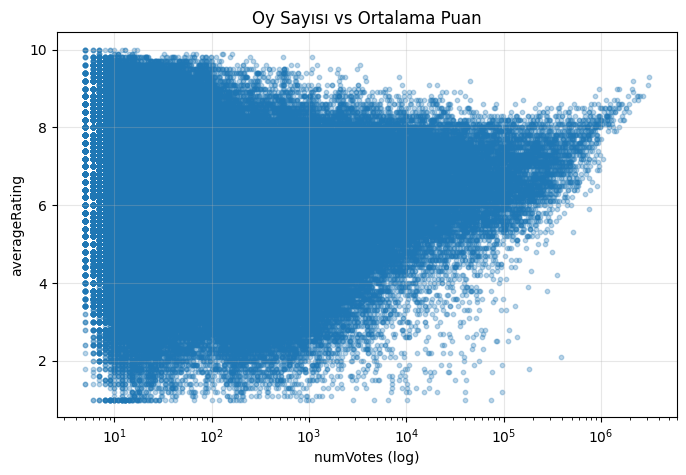

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(
    movies_with_ratings["numVotes"],
    movies_with_ratings["averageRating"],
    alpha=0.3,
    s=10
)
plt.xscale("log")
plt.title("Oy Sayısı vs Ortalama Puan")
plt.xlabel("numVotes (log)")
plt.ylabel("averageRating")
plt.grid(alpha=0.3)
plt.show()

In [46]:
top_list = movies_with_ratings[(movies_with_ratings["averageRating"] > AVG_RATING) & (movies_with_ratings["numVotes"] > RATING_COUNT)]
top_list = top_list.sort_values(by='averageRating', ascending = False)
top_list.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
83851,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994.0,NaN,142,Drama,9.3,3106911.0
50796,tt0068646,movie,The Godfather,The Godfather,0,1972.0,NaN,175,"Crime,Drama",9.2,2165420.0
242940,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008.0,NaN,152,"Action,Crime,Drama",9.1,3081907.0
81631,tt0108052,movie,Schindler's List,Schindler's List,0,1993.0,NaN,195,"Biography,Drama,History",9.0,1548964.0
113635,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003.0,NaN,201,"Adventure,Drama,Fantasy",9.0,2111285.0
90464,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001.0,NaN,178,"Adventure,Drama,Fantasy",8.9,2145644.0
373485,tt1375666,movie,Inception,Inception,0,2010.0,NaN,148,"Action,Adventure,Sci-Fi",8.8,2737223.0
99862,tt0137523,movie,Fight Club,Fight Club,0,1999.0,NaN,139,"Crime,Drama,Thriller",8.8,2521819.0
113636,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002.0,NaN,179,"Adventure,Drama,Fantasy",8.8,1904976.0
83642,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994.0,NaN,154,"Crime,Drama",8.8,2374333.0


In [45]:
top_list.shape

(28, 11)

In [84]:
# İlk 20 filmi al
title = top_list["primaryTitle"]

# Dosyaya yaz
with open("top_titles.txt", "w", encoding="utf-8") as f:
    for title in titles:
        f.write(title + "\n")

## Popularity with startYear

In [51]:
movie_ratings_df = movie_ratings_df.copy()
movie_ratings_df["startYear"] = movie_ratings_df["startYear"].astype("Int64")

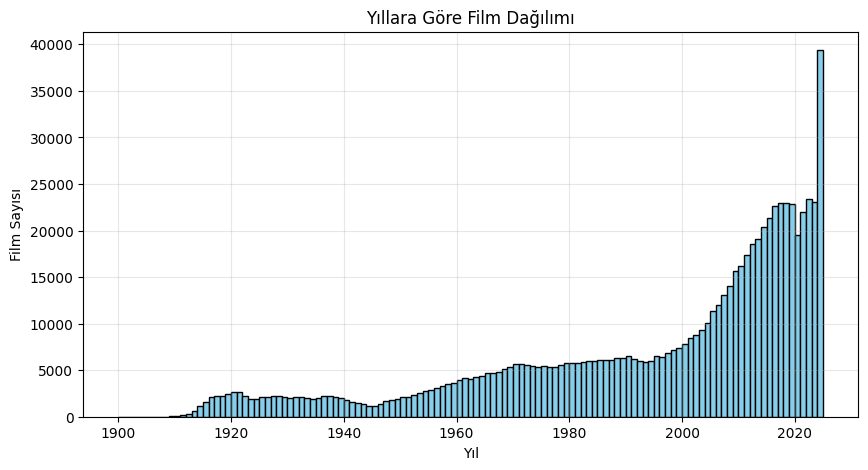

In [54]:
plt.figure(figsize=(10,5))
plt.hist(movie_ratings_df["startYear"], bins=range(1900, 2026), color="skyblue", edgecolor="black")
plt.title("Yıllara Göre Film Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Film Sayısı")
plt.grid(alpha=0.3)
plt.show()

In [59]:
movie_ratings_df.shape

(880559, 9)

In [61]:
movies_with_years = movie_ratings_df.merge(
    title_ratings_df[['tconst', 'averageRating', 'numVotes']],
    on='tconst',
    how='left'
)

In [62]:
movies_with_years.shape

(880559, 11)

In [70]:
filtered_movies = movies_with_years[movies_with_years["startYear"].isin([2024, 2025])]

In [71]:
filtered_movies.shape

(39389, 11)

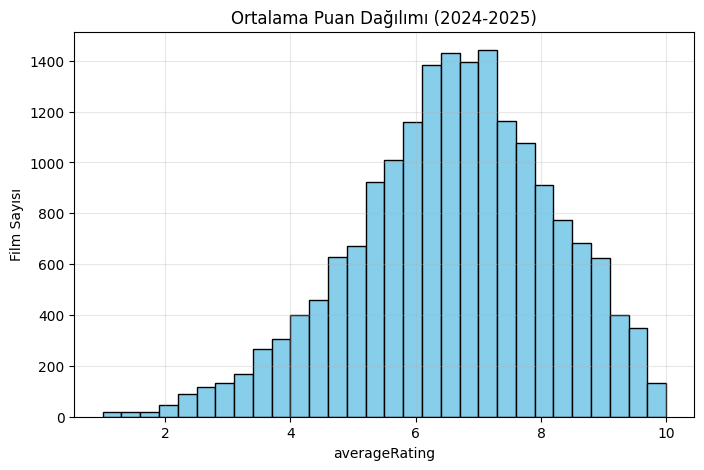

In [72]:
plt.figure(figsize=(8,5))
plt.hist(filtered_movies["averageRating"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Ortalama Puan Dağılımı (2024-2025)")
plt.xlabel("averageRating")
plt.ylabel("Film Sayısı")
plt.grid(alpha=0.3)
plt.show()

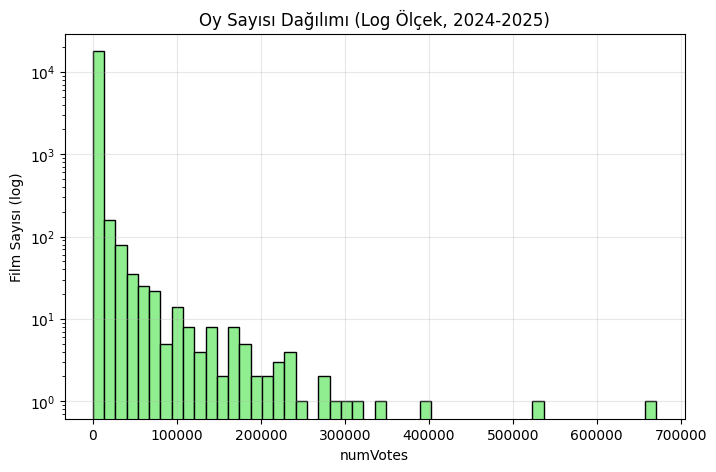

In [73]:
plt.figure(figsize=(8,5))
plt.hist(filtered_movies["numVotes"].dropna(), bins=50, log=True, color='lightgreen', edgecolor='black')
plt.title("Oy Sayısı Dağılımı (Log Ölçek, 2024-2025)")
plt.xlabel("numVotes")
plt.ylabel("Film Sayısı (log)")
plt.grid(alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [77]:
recent_popular = movies_with_years[
    (movies_with_years['startYear'].isin(RECENT_YEARS)) &
    (movies_with_years['numVotes'] >= RATING_COUNT_W_YEARS) &
    (movies_with_years['averageRating'] >= AVG_RATING_W_YEARS)
].sort_values(by=['averageRating', 'numVotes'], ascending=False)

In [78]:
recent_popular.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
413786,tt15239678,movie,Dune: Part Two,Dune: Part Two,0,2024,NaN,166,"Action,Adventure,Drama",8.5,671113.0
590453,tt29623480,movie,The Wild Robot,The Wild Robot,0,2024,NaN,102,"Adventure,Animation,Family",8.2,199445.0
406639,tt14961016,movie,I'm Still Here,Ainda Estou Aqui,0,2024,NaN,137,"Biography,Drama,History",8.2,120964.0
436070,tt16311594,movie,F1: The Movie,F1,0,2025,NaN,155,"Action,Drama,Sport",7.7,223041.0
608546,tt31193180,movie,Sinners,Sinners,0,2025,NaN,137,"Action,Drama,Horror",7.6,288629.0


In [79]:
recent_popular = recent_popular.sort_values(by='numVotes', ascending = False)

In [80]:
recent_popular.shape

(26, 11)

In [81]:
recent_popular.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
413786,tt15239678,movie,Dune: Part Two,Dune: Part Two,0,2024,NaN,166,"Action,Adventure,Drama",8.5,671113.0
789819,tt6263850,movie,Deadpool & Wolverine,Deadpool & Wolverine,0,2024,NaN,128,"Action,Adventure,Comedy",7.5,532127.0
451550,tt17526714,movie,The Substance,The Substance,0,2024,NaN,141,"Drama,Horror,Sci-Fi",7.2,341994.0
779721,tt5950044,movie,Superman,Superman,0,2025,NaN,129,"Action,Adventure,Sci-Fi",7.1,321344.0
328616,tt12037194,movie,Furiosa: A Mad Max Saga,Furiosa: A Mad Max Saga,0,2024,NaN,148,"Action,Adventure,Sci-Fi",7.5,304630.0
608546,tt31193180,movie,Sinners,Sinners,0,2025,NaN,137,"Action,Drama,Horror",7.6,288629.0
463160,tt18412256,movie,Alien: Romulus,Alien: Romulus,0,2024,NaN,119,"Horror,Sci-Fi,Thriller",7.1,269098.0
448826,tt17279496,movie,Civil War,Civil War,0,2024,NaN,109,"Action,Thriller",7.0,253287.0
749117,tt5040012,movie,Nosferatu,Nosferatu,0,2024,NaN,132,"Fantasy,Horror,Mystery",7.2,238420.0
508818,tt22022452,movie,Inside Out 2,Inside Out 2,0,2024,NaN,96,"Adventure,Animation,Comedy",7.5,232955.0


In [83]:
# İlk 20 filmi al
titles = recent_popular.head(26)["primaryTitle"]

# Dosyaya yaz
with open("top_w_years_titles.txt", "w", encoding="utf-8") as f:
    for title in titles:
        f.write(title + "\n")